In [2]:
# import torch
import json
import re
from pathlib import Path
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

table_path = Path("tables")
if not table_path.exists():
    table_path.mkdir(exist_ok=True)

## RoBERTa Base Results

In [173]:
# Table :
# Method | # params # SST-2 # MRPC # CoLA # QNLI # RTE # STS-B #

tab = [
    ["FT$^*$", "125M", 94.8, 90.2, 63.6, 92.8, 78.7, 91.2],
    ["BitFit$^*$", "0.1M", 93.7, 92.7, 62.0, 91.8, 81.5, 90.8],
    [
        "VeRA$^*$",
        "0.04M",
        "94.6±.1",
        "89.5±.5",
        "65.6±.8",
        "91.8±.2",
        "78.7±.7",
        "90.7±.2",
    ],
    [
        "LoRA$^*$",
        "0.3M",
        "95.1±.2",
        "89.7±.7",
        "63.4±1.2",
        "93.3±.3",
        "86.6±.7",
        "91.5±.2",
    ],
    [
        "DynaLoRA$^*$",
        "0.3M",
        "95.1±.2",
        "89.7±.7",
        "63.4±1.2",
        "93.3±.3",
        "86.6±.7",
        "91.5±.2",
    ],
]

tab = pd.DataFrame(
    tab,
    columns=[
        "Method",
        "\# Trainable Params",
        "SST-2",
        "MRPC",
        "CoLA",
        "QNLI",
        "RTE",
        "STS-B",
    ],
)


tab["Average"] = (
    (tab.iloc[:, 2:].map(lambda x: float(x.split("±")[0]) if isinstance(x, str) else x))
    .mean(axis=1)
    .round(1)
)

display(tab)

tab_latex = (
    tab.map(str)
    .style.hide(level=0, axis=0)
    .highlight_max(axis=0, props="font-weight:bold")
    .to_latex(
        # position_float="centering",
        convert_css=True,
        hrules=True,
        # caption="Results on the GLUE benchmark for the RoBERTa-base model. Results derived from the original paper are indicated with asterisk.",
        # label="tab:glue_results_base",
        column_format="lcccccccc",
    )
)

tab_latex = tab_latex.replace("table", "table*").replace("±", r"\tiny ±")
with open(table_path / "glue_results_base.tex", "w") as f:
    f.write(tab_latex)
print(tab_latex)

,Method,\# Trainable Params,SST-2,MRPC,CoLA,QNLI,RTE,STS-B,Average
0,FT$^*$,125M,94.8,90.2,63.6,92.8,78.7,91.2,85.2
1,BitFit$^*$,0.1M,93.7,92.7,62.0,91.8,81.5,90.8,85.4
2,VeRA$^*$,0.04M,94.6±.1,89.5±.5,65.6±.8,91.8±.2,78.7±.7,90.7±.2,85.1
3,LoRA$^*$,0.3M,95.1±.2,89.7±.7,63.4±1.2,93.3±.3,86.6±.7,91.5±.2,86.6


\begin{tabular}{lcccccccc}
\toprule
Method & \# Trainable Params & SST-2 & MRPC & CoLA & QNLI & RTE & STS-B & Average \\
\midrule
FT$^*$ & \bfseries 125M & 94.8 & 90.2 & 63.6 & 92.8 & 78.7 & 91.2 & 85.2 \\
BitFit$^*$ & 0.1M & 93.7 & \bfseries 92.7 & 62.0 & 91.8 & 81.5 & 90.8 & 85.4 \\
\bfseries VeRA$^*$ & 0.04M & 94.6\tiny ±.1 & 89.5\tiny ±.5 & \bfseries 65.6\tiny ±.8 & 91.8\tiny ±.2 & 78.7\tiny ±.7 & 90.7\tiny ±.2 & 85.1 \\
LoRA$^*$ & 0.3M & \bfseries 95.1\tiny ±.2 & 89.7\tiny ±.7 & 63.4\tiny ±1.2 & \bfseries 93.3\tiny ±.3 & \bfseries 86.6\tiny ±.7 & \bfseries 91.5\tiny ±.2 & \bfseries 86.6 \\
\bottomrule
\end{tabular}



In [ ]:
# Table :
# Method | # params # SST-2 # MRPC # CoLA # QNLI # RTE # STS-B #

# ROBERTA LARGE

tab = [
    ["FT$^*$", "125M", 94.8, 90.2, 63.6, 92.8, 78.7, 91.2],
    ["BitFit$^*$", "0.1M", 93.7, 92.7, 62.0, 91.8, 81.5, 90.8],
    [
        "VeRA$^*$",
        "0.04M",
        "94.6±.1",
        "89.5±.5",
        "65.6±.8",
        "91.8±.2",
        "78.7±.7",
        "90.7±.2",
    ],
    [
        "LoRA$^*$",
        "0.3M",
        "95.1±.2",
        "89.7±.7",
        "63.4±1.2",
        "93.3±.3",
        "86.6±.7",
        "91.5±.2",
    ],
    [
        "DynaLoRA$^*$",
        "0.3M",
        "95.1±.2",
        "89.7±.7",
        "63.4±1.2",
        "93.3±.3",
        "86.6±.7",
        "91.5±.2",
    ],
]

tab = pd.DataFrame(
    tab,
    columns=[
        "Method",
        "\# Trainable Params",
        "SST-2",
        "MRPC",
        "CoLA",
        "QNLI",
        "RTE",
        "STS-B",
    ],
)


tab["Average"] = (
    (tab.iloc[:, 2:].map(lambda x: float(x.split("±")[0]) if isinstance(x, str) else x))
    .mean(axis=1)
    .round(1)
)

display(tab)

tab_latex = (
    tab.map(str)
    .style.hide(level=0, axis=0)
    .highlight_max(axis=0, props="font-weight:bold")
    .to_latex(
        # position_float="centering",
        convert_css=True,
        hrules=True,
        # caption="Results on the GLUE benchmark for the RoBERTa-base model. Results derived from the original paper are indicated with asterisk.",
        # label="tab:glue_results_base",
        column_format="lcccccccc",
    )
)

tab_latex = tab_latex.replace("table", "table*").replace("±", r"\tiny ±")
with open(table_path / "glue_results_base.tex", "w") as f:
    f.write(tab_latex)
print(tab_latex)

,Method,\# Trainable Params,SST-2,MRPC,CoLA,QNLI,RTE,STS-B,Average
0,FT$^*$,125M,94.8,90.2,63.6,92.8,78.7,91.2,85.2
1,BitFit$^*$,0.1M,93.7,92.7,62.0,91.8,81.5,90.8,85.4
2,VeRA$^*$,0.04M,94.6±.1,89.5±.5,65.6±.8,91.8±.2,78.7±.7,90.7±.2,85.1
3,LoRA$^*$,0.3M,95.1±.2,89.7±.7,63.4±1.2,93.3±.3,86.6±.7,91.5±.2,86.6


\begin{tabular}{lcccccccc}
\toprule
Method & \# Trainable Params & SST-2 & MRPC & CoLA & QNLI & RTE & STS-B & Average \\
\midrule
FT$^*$ & \bfseries 125M & 94.8 & 90.2 & 63.6 & 92.8 & 78.7 & 91.2 & 85.2 \\
BitFit$^*$ & 0.1M & 93.7 & \bfseries 92.7 & 62.0 & 91.8 & 81.5 & 90.8 & 85.4 \\
\bfseries VeRA$^*$ & 0.04M & 94.6\tiny ±.1 & 89.5\tiny ±.5 & \bfseries 65.6\tiny ±.8 & 91.8\tiny ±.2 & 78.7\tiny ±.7 & 90.7\tiny ±.2 & 85.1 \\
LoRA$^*$ & 0.3M & \bfseries 95.1\tiny ±.2 & 89.7\tiny ±.7 & 63.4\tiny ±1.2 & \bfseries 93.3\tiny ±.3 & \bfseries 86.6\tiny ±.7 & \bfseries 91.5\tiny ±.2 & \bfseries 86.6 \\
\bottomrule
\end{tabular}



In [3]:
LoRA_paper = defaultdict(dict)
LoRA_paper['sst2'] = {'eval_accuracy' : 95.1/100}
LoRA_paper['mrpc'] = {'eval_accuracy' : 89.7/100}
LoRA_paper['cola'] = {'eval_matthews_correlation' : 63.4/100}
LoRA_paper['qnli'] = {'eval_accuracy' : 93.3/100}
LoRA_paper['rte'] = {'eval_accuracy' : 86.6/100}
LoRA_paper['stsb'] = {'eval_pearson' : 91.5/100}

VeRA_paper = defaultdict(dict)
VeRA_paper['sst2'] = {'eval_accuracy' : 94.6/100}
VeRA_paper['mrpc'] = {'eval_accuracy' : 89.5/100}
VeRA_paper['cola'] = {'eval_matthews_correlation' : 65.6/100}
VeRA_paper['qnli'] = {'eval_accuracy' : 91.8/100}
VeRA_paper['rte'] = {'eval_accuracy' : 78.7/100}
VeRA_paper['stsb'] = {'eval_pearson' : 90.7/100}

In [4]:
#DynaLoRA Periodic;50 random;16 target_modules=qv; everything else default from the original LoRA paper
#sst2 and qnli got interrupted but doesn't matter because the performance plateaued
dynalora_random_qv = defaultdict(dict)
dynalora_random_qv['sst2'] = {'eval_loss': 0.24287724494934082, 'eval_accuracy': 0.9357798165137615, 'eval_runtime': 1.1623, 'eval_samples_per_second': 750.217, 'eval_steps_per_second': 47.319, 'epoch': 14.0}
dynalora_random_qv['mrpc'] = {'eval_loss': 0.693554699420929, 'eval_accuracy': 0.8799019607843137, 'eval_f1': 0.9141856392294221, 'eval_runtime': 0.5891, 'eval_samples_per_second': 692.532, 'eval_steps_per_second': 44.132, 'epoch': 30.0}
dynalora_random_qv['cola'] = {'eval_loss': 0.6189889311790466, 'eval_matthews_correlation': 0.0, 'eval_runtime': 0.4037, 'eval_samples_per_second': 2583.694, 'eval_steps_per_second': 42.112, 'epoch': 80.0}
dynalora_random_qv['qnli'] = {'eval_loss': 0.23993942141532898, 'eval_accuracy': 0.9200073219842577, 'eval_runtime': 4.1085, 'eval_samples_per_second': 1329.673, 'eval_steps_per_second': 41.621, 'epoch': 16.0}
dynalora_random_qv['rte'] ={'eval_loss': 2.685006856918335, 'eval_accuracy': 0.7292418772563177, 'eval_runtime': 0.2498, 'eval_samples_per_second': 1108.997, 'eval_steps_per_second': 36.032, 'epoch': 80.0}
dynalora_random_qv['stsb'] = {'eval_loss': 0.4224475026130676, 'eval_pearson': 0.904029385517803, 'eval_spearmanr': 0.900789506271477, 'eval_runtime': 2.0242, 'eval_samples_per_second': 741.032, 'eval_steps_per_second': 46.438, 'epoch': 60.0}

In [5]:
#DynaLoRA Periodic;50 scaled_multinomial;16 target_modules=qv; everything else default from the original LoRA paper
#sst2 and qnli got interrupted but doesn't matter because the performance plateaued
dynalora_periodic_qv = defaultdict(dict)
dynalora_periodic_qv['sst2'] = {'eval_loss': 0.29289835691452026, 'eval_accuracy': 0.9357798165137615, 'eval_runtime': 1.1564, 'eval_samples_per_second': 754.057, 'eval_steps_per_second': 47.561, 'epoch': 14.0}
dynalora_periodic_qv['mrpc'] =  {'eval_loss': 0.6382217407226562, 'eval_accuracy': 0.8799019607843137, 'eval_f1': 0.9126559714795008, 'eval_runtime': 0.5765, 'eval_samples_per_second': 707.693, 'eval_steps_per_second': 45.098, 'epoch': 30.0}
dynalora_periodic_qv['cola'] = {'eval_loss': 0.7748498916625977, 'eval_matthews_correlation': 0.613211494270806, 'eval_runtime': 0.7249, 'eval_samples_per_second': 1438.813, 'eval_steps_per_second': 45.523, 'epoch': 80.0}
dynalora_periodic_qv['qnli'] = {'eval_loss': 0.2071428894996643, 'eval_accuracy': 0.9245835621453414, 'eval_runtime': 3.9549, 'eval_samples_per_second': 1381.322, 'eval_steps_per_second': 43.237, 'epoch': 18.0}
dynalora_periodic_qv['rte'] = {'eval_loss': 2.398937225341797, 'eval_accuracy': 0.7436823104693141, 'eval_runtime': 0.2486, 'eval_samples_per_second': 1114.257, 'eval_steps_per_second': 36.203, 'epoch': 80.0}
dynalora_periodic_qv['stsb'] = {'eval_loss': 0.4319670796394348, 'eval_pearson': 0.9015937752451963, 'eval_spearmanr': 0.8973924327737192, 'eval_runtime': 2.0066, 'eval_samples_per_second': 747.547, 'eval_steps_per_second': 46.846, 'epoch': 60.0}

In [6]:
#DnyaVera Periodic;50 scaled_multinomial;16 target_modules=qv; everything else default from the original LoRA paper
#sst2 and qnli got interrupted but doesn't matter because the performance plateaued
dynavera_periodic_qv_ = defaultdict(dict)
dynavera_periodic_qv_['sst2' ] = {'eval_loss': 0.20146049559116364, 'eval_accuracy': 0.930045871559633, 'eval_runtime': 1.2286, 'eval_samples_per_second': 709.758, 'eval_steps_per_second': 44.767, 'epoch': 14.0}
dynavera_periodic_qv_['mrpc' ] = {'eval_loss': 0.35436925292015076, 'eval_accuracy': 0.8455882352941176, 'eval_f1': 0.8908145580589255, 'eval_runtime': 0.6047, 'eval_samples_per_second': 674.692, 'eval_steps_per_second': 42.995, 'epoch': 30.0}
dynavera_periodic_qv_['cola' ] = {'eval_loss': 0.4688529074192047, 'eval_matthews_correlation': 0.5726807034874348, 'eval_runtime': 0.7509, 'eval_samples_per_second': 1388.921, 'eval_steps_per_second': 43.945, 'epoch': 80.0}
dynavera_periodic_qv_['qlni' ] = {'eval_loss': 0.2479555308818817, 'eval_accuracy': 0.900054914881933, 'eval_runtime': 4.2944, 'eval_samples_per_second': 1272.109, 'eval_steps_per_second': 39.819, 'epoch': 16.0}
dynavera_periodic_qv_['rte' ] ={'eval_loss': 0.6436030268669128, 'eval_accuracy': 0.7184115523465704, 'eval_runtime': 0.2626, 'eval_samples_per_second': 1054.699, 'eval_steps_per_second': 34.268, 'epoch': 80.0}
dynavera_periodic_qv_['stsb' ] = {'eval_loss': 0.4433596134185791, 'eval_pearson': 0.8998979883307653, 'eval_spearmanr': 0.8982344018448297, 'eval_runtime': 2.082, 'eval_samples_per_second': 720.454, 'eval_steps_per_second': 45.148, 'epoch': 60.0}


In [7]:
#DynaVera Periodic;50 scaled_multinomial;16 target_modules=qv; --learning_rate 5e-03, the rest default from VeRA paper
#sst2 and qnli got interrupted but doesn't matter because the performance plateaued
dynavera_periodic_qv = defaultdict(dict)
dynavera_periodic_qv['sst2']=  {'eval_loss': 0.20765171945095062, 'eval_accuracy': 0.948394495412844, 'eval_runtime': 0.3514, 'eval_samples_per_second': 2481.756, 'eval_steps_per_second': 39.845, 'epoch': 55.0}
dynavera_periodic_qv['mrpc']=  {'eval_loss': 0.36242952942848206, 'eval_accuracy': 0.8725490196078431, 'eval_f1': 0.9074733096085409, 'eval_runtime': 0.2077, 'eval_samples_per_second': 1964.719, 'eval_steps_per_second': 33.708, 'epoch': 30.0}
dynavera_periodic_qv['cola']=  {'eval_loss': 0.6417329907417297, 'eval_matthews_correlation': 0.6509996377817916, 'eval_runtime': 0.4068, 'eval_samples_per_second': 2563.973, 'eval_steps_per_second': 41.791, 'epoch': 80.0}
dynavera_periodic_qv['qnli']=  {'eval_loss': 0.20788568258285522, 'eval_accuracy': 0.9240344133260113, 'eval_runtime': 3.3208, 'eval_samples_per_second': 1645.073, 'eval_steps_per_second': 25.897, 'epoch': 22.0}
dynavera_periodic_qv['rte']= {'eval_loss': 1.5039279460906982, 'eval_accuracy': 0.7653429602888087, 'eval_runtime': 0.2725, 'eval_samples_per_second': 1016.37, 'eval_steps_per_second': 18.346, 'epoch': 160.0}
dynavera_periodic_qv['stsb']=  {'eval_loss': 0.4157522916793823, 'eval_pearson': 0.9063407242521716, 'eval_spearmanr': 0.9033773221678157, 'eval_runtime': 0.6282, 'eval_samples_per_second': 2387.813, 'eval_steps_per_second': 38.205, 'epoch': 80.0}


In [8]:
# dynalora : Periodic;50, scaled_multinomial;20, target_modules=qkv, 60 epochs
dynalora_periodic_qkv = defaultdict(dict)
dynalora_periodic_qkv['sst2'] =  {'eval_loss': 0.239357128739357, 'eval_accuracy': 0.9369266055045872, 'eval_runtime': 0.7175, 'eval_samples_per_second': 1215.352, 'eval_steps_per_second': 39.025, 'epoch': 24.0}
dynalora_periodic_qkv['mrpc'] =  {'eval_loss': 0.7762095928192139, 'eval_accuracy': 0.8799019607843137, 'eval_f1': 0.9144851657940664, 'eval_runtime': 0.3631, 'eval_samples_per_second': 1123.625, 'eval_steps_per_second': 35.802, 'epoch': 60.0}
dynalora_periodic_qkv['cola'] =  {'eval_loss': 0.7190002202987671, 'eval_matthews_correlation': 0.6008475155631261, 'eval_runtime': 0.8257, 'eval_samples_per_second': 1263.146, 'eval_steps_per_second': 39.965, 'epoch': 60.0}
dynalora_periodic_qkv['qnli'] = {'eval_loss': 0.2183120846748352, 'eval_accuracy': 0.9229361156873512, 'eval_runtime': 4.5767, 'eval_samples_per_second': 1193.642, 'eval_steps_per_second': 37.363, 'epoch': 14.0}
dynalora_periodic_qkv['rte:'] = {'eval_loss': 1.549071192741394, 'eval_accuracy': 0.7581227436823105, 'eval_runtime': 0.2701, 'eval_samples_per_second': 1025.541, 'eval_steps_per_second': 33.321, 'epoch': 60.0}
dynalora_periodic_qkv['stsb'] =  {'eval_loss': 0.4212930500507355, 'eval_pearson': 0.9052542545685183, 'eval_spearmanr': 0.9010987912062565, 'eval_runtime': 1.2137, 'eval_samples_per_second': 1235.874, 'eval_steps_per_second': 38.724, 'epoch': 60.0}


In [9]:
# dynavera (default parameters paper, 5E-3) : Periodic;50, scaled_multinomial;20, target_modules=qkv
dynavera_periodic_qkv = defaultdict(dict)
dynavera_periodic_qkv['sst2']={'eval_loss': 0.2185388207435608, 'eval_accuracy': 0.9426605504587156, 'eval_runtime': 0.4014, 'eval_samples_per_second': 2172.206, 'eval_steps_per_second': 34.875, 'epoch': 45.0}
dynavera_periodic_qkv['mrpc']={'eval_loss': 0.4157954454421997, 'eval_accuracy': 0.8700980392156863, 'eval_f1': 0.9065255731922398, 'eval_runtime': 0.2406, 'eval_samples_per_second': 1696.037, 'eval_steps_per_second': 29.099, 'epoch': 30.0}
dynavera_periodic_qkv['cola']={'eval_loss': 0.6738746166229248, 'eval_matthews_correlation': 0.5909585115904812, 'eval_runtime': 0.4746, 'eval_samples_per_second': 2197.695, 'eval_steps_per_second': 35.821, 'epoch': 80.0}
dynavera_periodic_qkv['qnli']={'eval_loss': 0.21886950731277466, 'eval_accuracy': 0.917993776313381, 'eval_runtime': 3.7892, 'eval_samples_per_second': 1441.748, 'eval_steps_per_second': 22.696, 'epoch': 17.0}
dynavera_periodic_qkv['rte']={'eval_loss': 1.7529410123825073, 'eval_accuracy': 0.7545126353790613, 'eval_runtime': 0.3114, 'eval_samples_per_second': 889.48, 'eval_steps_per_second': 16.056, 'epoch': 160.0}
dynavera_periodic_qkv['stsb']={'eval_loss': 0.4286552369594574, 'eval_pearson': 0.903294532696409, 'eval_spearmanr': 0.9001999829846955, 'eval_runtime': 0.7144, 'eval_samples_per_second': 2099.528, 'eval_steps_per_second': 33.592, 'epoch': 80.0}

In [10]:
# dynavera (paper config, 5E-3) : once;3, scaled_multinomial;20, target_modules=qkv,
dynavera_once_qkv = defaultdict(dict)
dynavera_once_qkv['sst2']={'eval_loss': 0.26094841957092285, 'eval_accuracy': 0.9346330275229358, 'eval_runtime': 0.4125, 'eval_samples_per_second': 2113.804, 'eval_steps_per_second': 33.937, 'epoch': 45.0}
dynavera_once_qkv['mrpc']={'eval_loss': 0.42555972933769226, 'eval_accuracy': 0.8676470588235294, 'eval_f1': 0.9045936395759717, 'eval_runtime': 0.2419, 'eval_samples_per_second': 1686.814, 'eval_steps_per_second': 28.94, 'epoch': 30.0}
dynavera_once_qkv['cola']={'eval_loss': 0.6868337988853455, 'eval_matthews_correlation': 0.6380902412628672, 'eval_runtime': 0.4635, 'eval_samples_per_second': 2250.175, 'eval_steps_per_second': 36.676, 'epoch': 80.0}
dynavera_once_qkv['qnli']={'eval_loss': 0.21345952153205872, 'eval_accuracy': 0.9161632802489474, 'eval_runtime': 3.7829, 'eval_samples_per_second': 1444.129, 'eval_steps_per_second': 22.734, 'epoch': 17.0}
dynavera_once_qkv['rte']={'eval_loss': 1.6604375839233398, 'eval_accuracy': 0.7364620938628159, 'eval_runtime': 0.3104, 'eval_samples_per_second': 892.399, 'eval_steps_per_second': 16.108, 'epoch': 160.0}
dynavera_once_qkv['stsb']={'eval_loss': 0.4192526340484619, 'eval_pearson': 0.9062964448204726, 'eval_spearmanr': 0.9031000200058047, 'eval_runtime': 0.7215, 'eval_samples_per_second': 2078.879, 'eval_steps_per_second': 33.262, 'epoch': 80.0}

In [11]:
# dynavera (default parameters paper, 5E-3) : Periodic;50, random;20, target_modules=qkv
dynavera_random_qkv = defaultdict(dict)
dynavera_random_qkv['sst2']= {'eval_loss': 0.2706182599067688, 'eval_accuracy': 0.9277522935779816, 'eval_runtime': 0.4029, 'eval_samples_per_second': 2164.287, 'eval_steps_per_second': 34.748, 'epoch': 44.0}
dynavera_random_qkv['mrpc']= {'eval_loss': 0.4409703016281128, 'eval_accuracy': 0.8774509803921569, 'eval_f1': 0.9122807017543859, 'eval_runtime': 0.2416, 'eval_samples_per_second': 1688.455, 'eval_steps_per_second': 28.969, 'epoch': 30.0}
dynavera_random_qkv['cola']= {'eval_loss': 0.7155706882476807, 'eval_matthews_correlation': 0.6106988552195535, 'eval_runtime': 0.4718, 'eval_samples_per_second': 2210.732, 'eval_steps_per_second': 36.033, 'epoch': 80.0}
dynavera_random_qkv['qnli']= {'eval_loss': 0.21248868107795715, 'eval_accuracy': 0.918542925132711, 'eval_runtime': 3.8347, 'eval_samples_per_second': 1424.641, 'eval_steps_per_second': 22.427, 'epoch': 17.0}
dynavera_random_qkv['rte']= {'eval_loss': 1.806179165840149, 'eval_accuracy': 0.7256317689530686, 'eval_runtime': 0.3107, 'eval_samples_per_second': 891.483, 'eval_steps_per_second': 16.092, 'epoch': 160.0}
dynavera_random_qkv['stsb']={'eval_loss': 0.4234631359577179, 'eval_pearson': 0.906491195844033, 'eval_spearmanr': 0.902952775584094, 'eval_runtime': 0.7103, 'eval_samples_per_second': 2111.714, 'eval_steps_per_second': 33.787, 'epoch': 80.0}

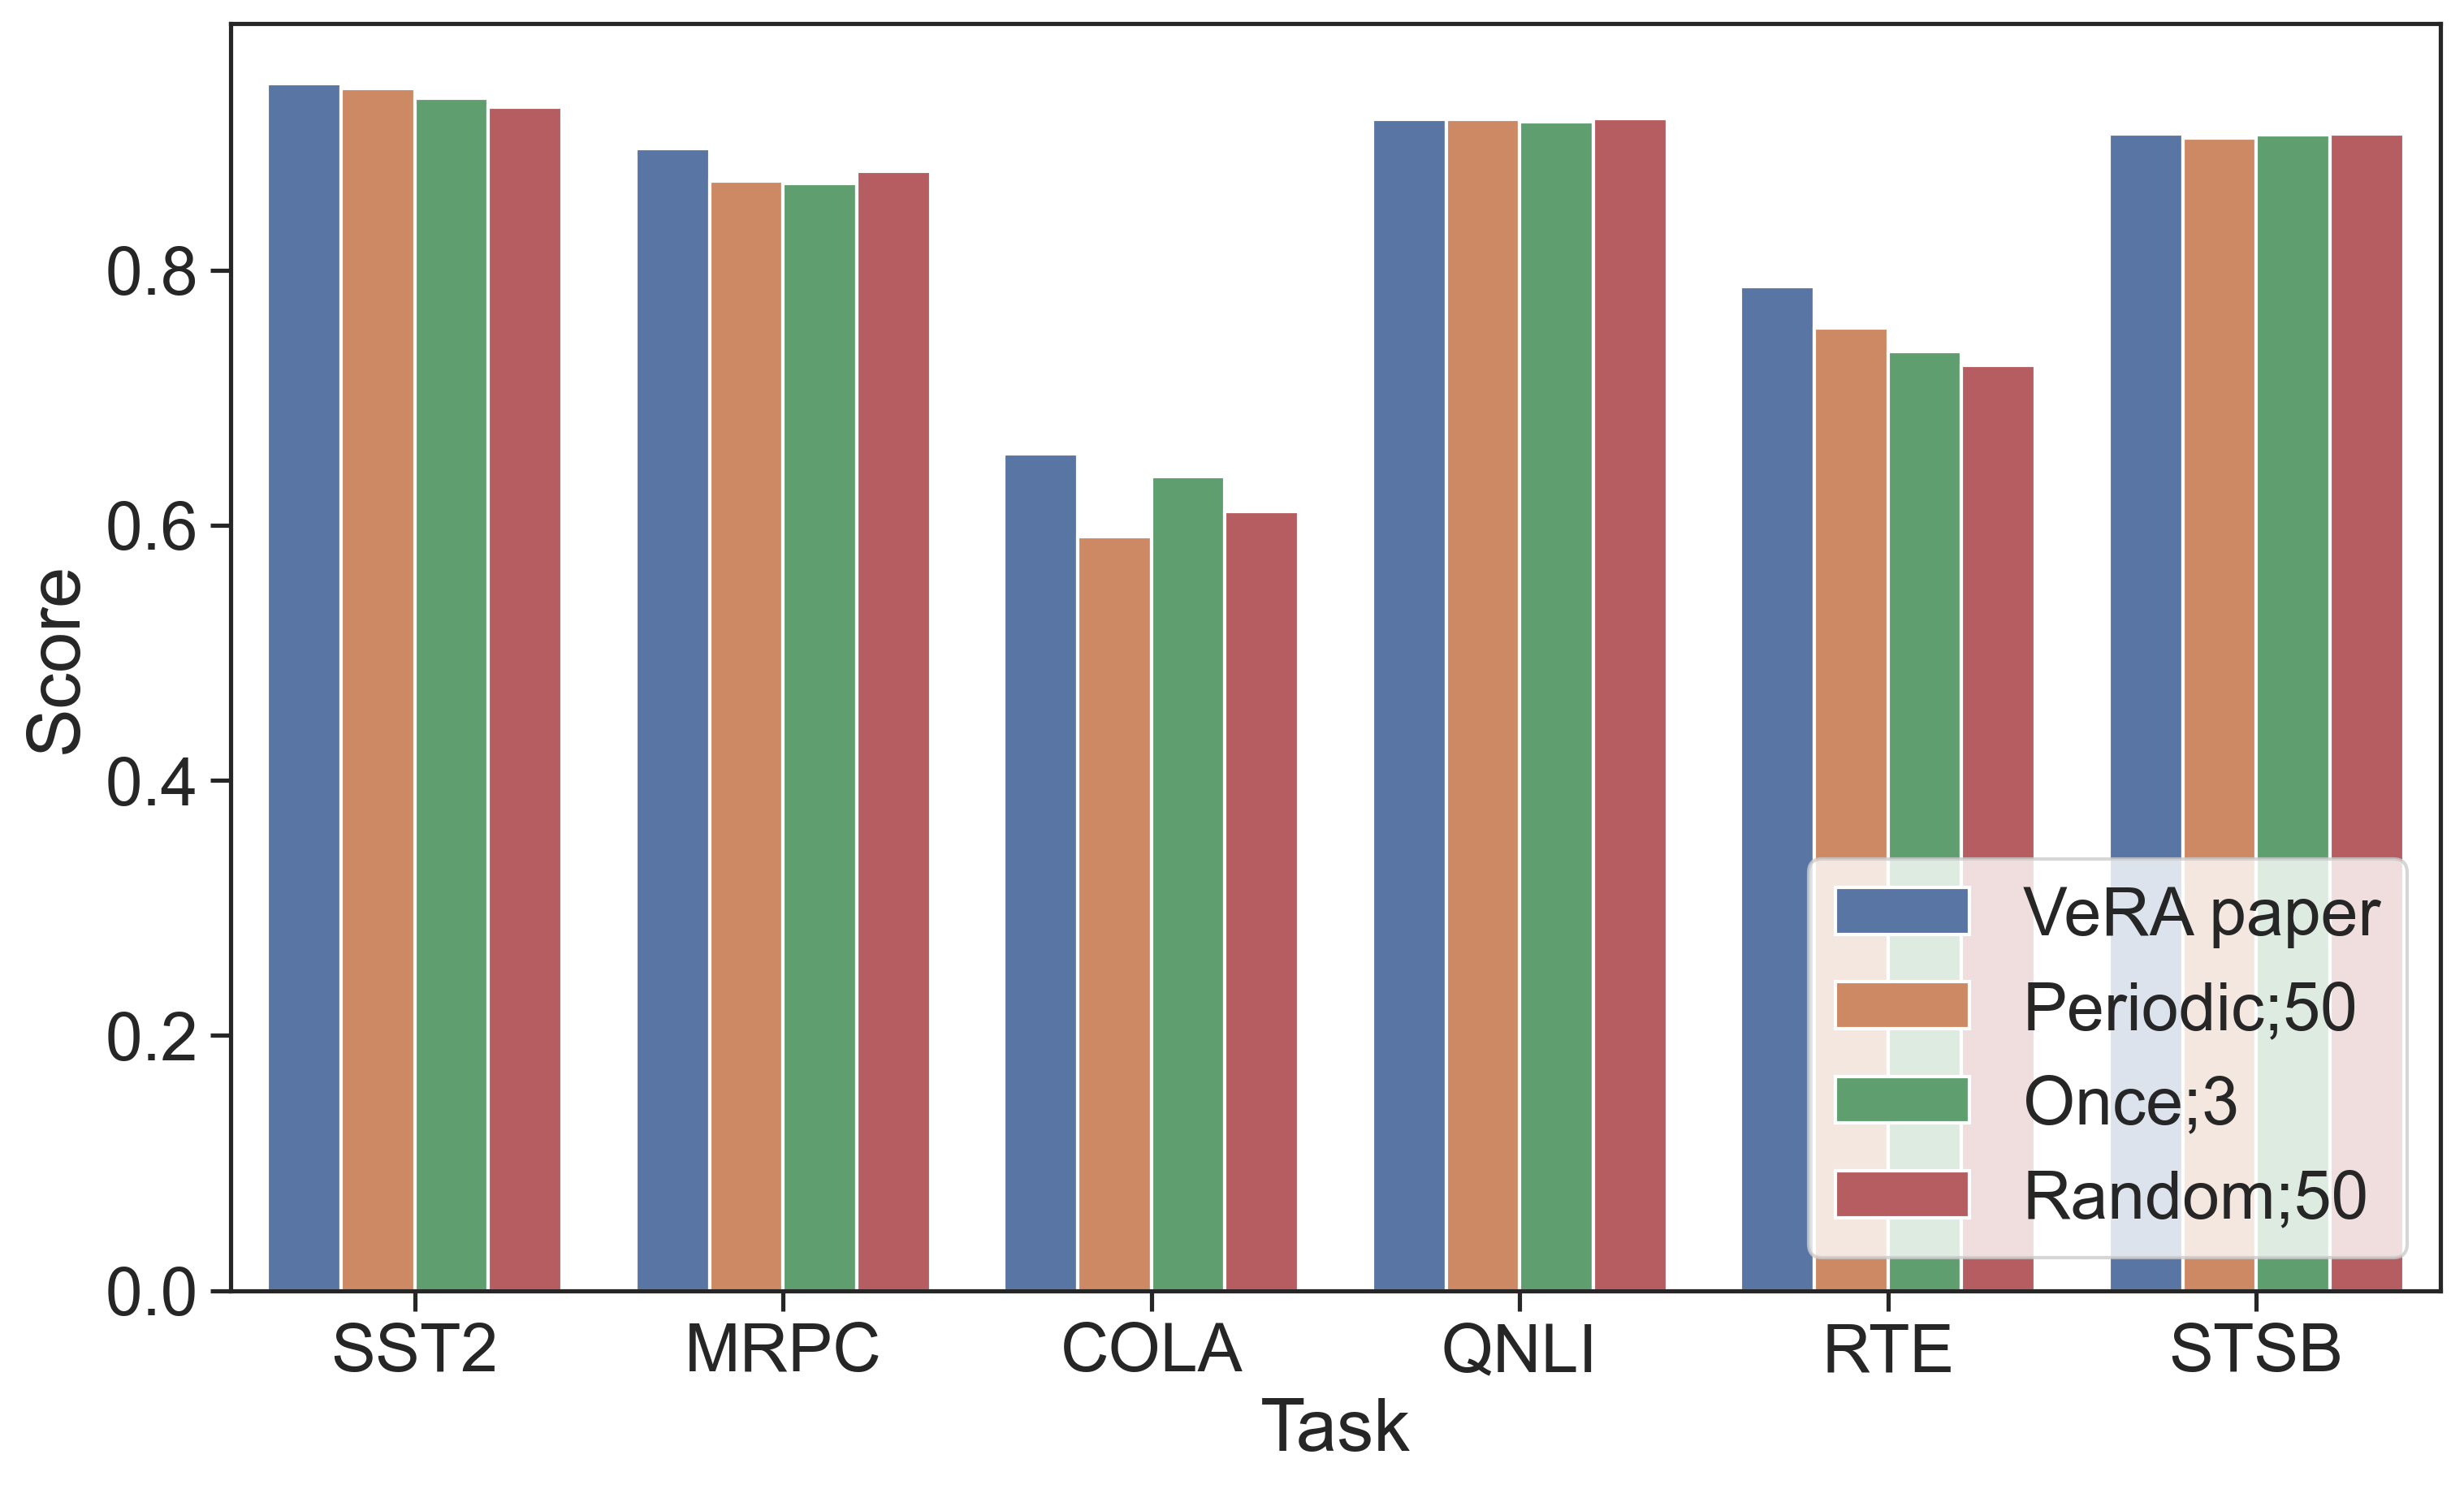

In [21]:
# sns.set_theme()
# # For the image quality of the graphic. 
# sns.set_theme(rc={"figure.dpi":150})
# # For the size of the graphics
# sns.set_theme(rc = {"figure.figsize":(6,3)})

sns.set_theme(
    context="notebook",
    style="ticks",
    font_scale=1.8,
    rc={"figure.dpi": 300, "figure.constrained_layout.use": True, "lines.linewidth": 3, "figure.figsize": (6,3)},
)

def create_barplot(
    data_dicts:list[dict],
    names:list[str],
    title:str
):
    get_results = lambda x: [x['sst2']['eval_accuracy'], x['mrpc']['eval_accuracy'],\
         x['cola']['eval_matthews_correlation'], x['qnli']['eval_accuracy'], \
            x['rte']['eval_accuracy'], x['stsb']['eval_pearson']]

    data = {name : get_results(data_dict) for name, data_dict in zip(names, data_dicts) }
    data.update({'Task' : [k.upper() for k in data_dicts[0].keys()]})
    df = pd.DataFrame(data)
    df_melted = df.melt(id_vars='Task', var_name='Result', value_name='Score')
    plt.figure(figsize=(10, 6))
    bar_plot = sns.barplot(x='Task', y='Score', hue='Result', data=df_melted)
    # plt.title(title)
    plt.xlabel('Task')
    plt.ylabel('Score')
    plt.legend(loc='lower right')

    # Show the plot
    plt.show()


create_barplot(
    data_dicts=[VeRA_paper, dynavera_periodic_qkv, dynavera_once_qkv, dynavera_random_qkv ],
    names=['VeRA paper','Periodic;50', 'Once;3', 'Random;50'],
    title='DynaVeRA Results Across Different Allocation Strategies (QKV:20) [RoBERTa-base] '
    )


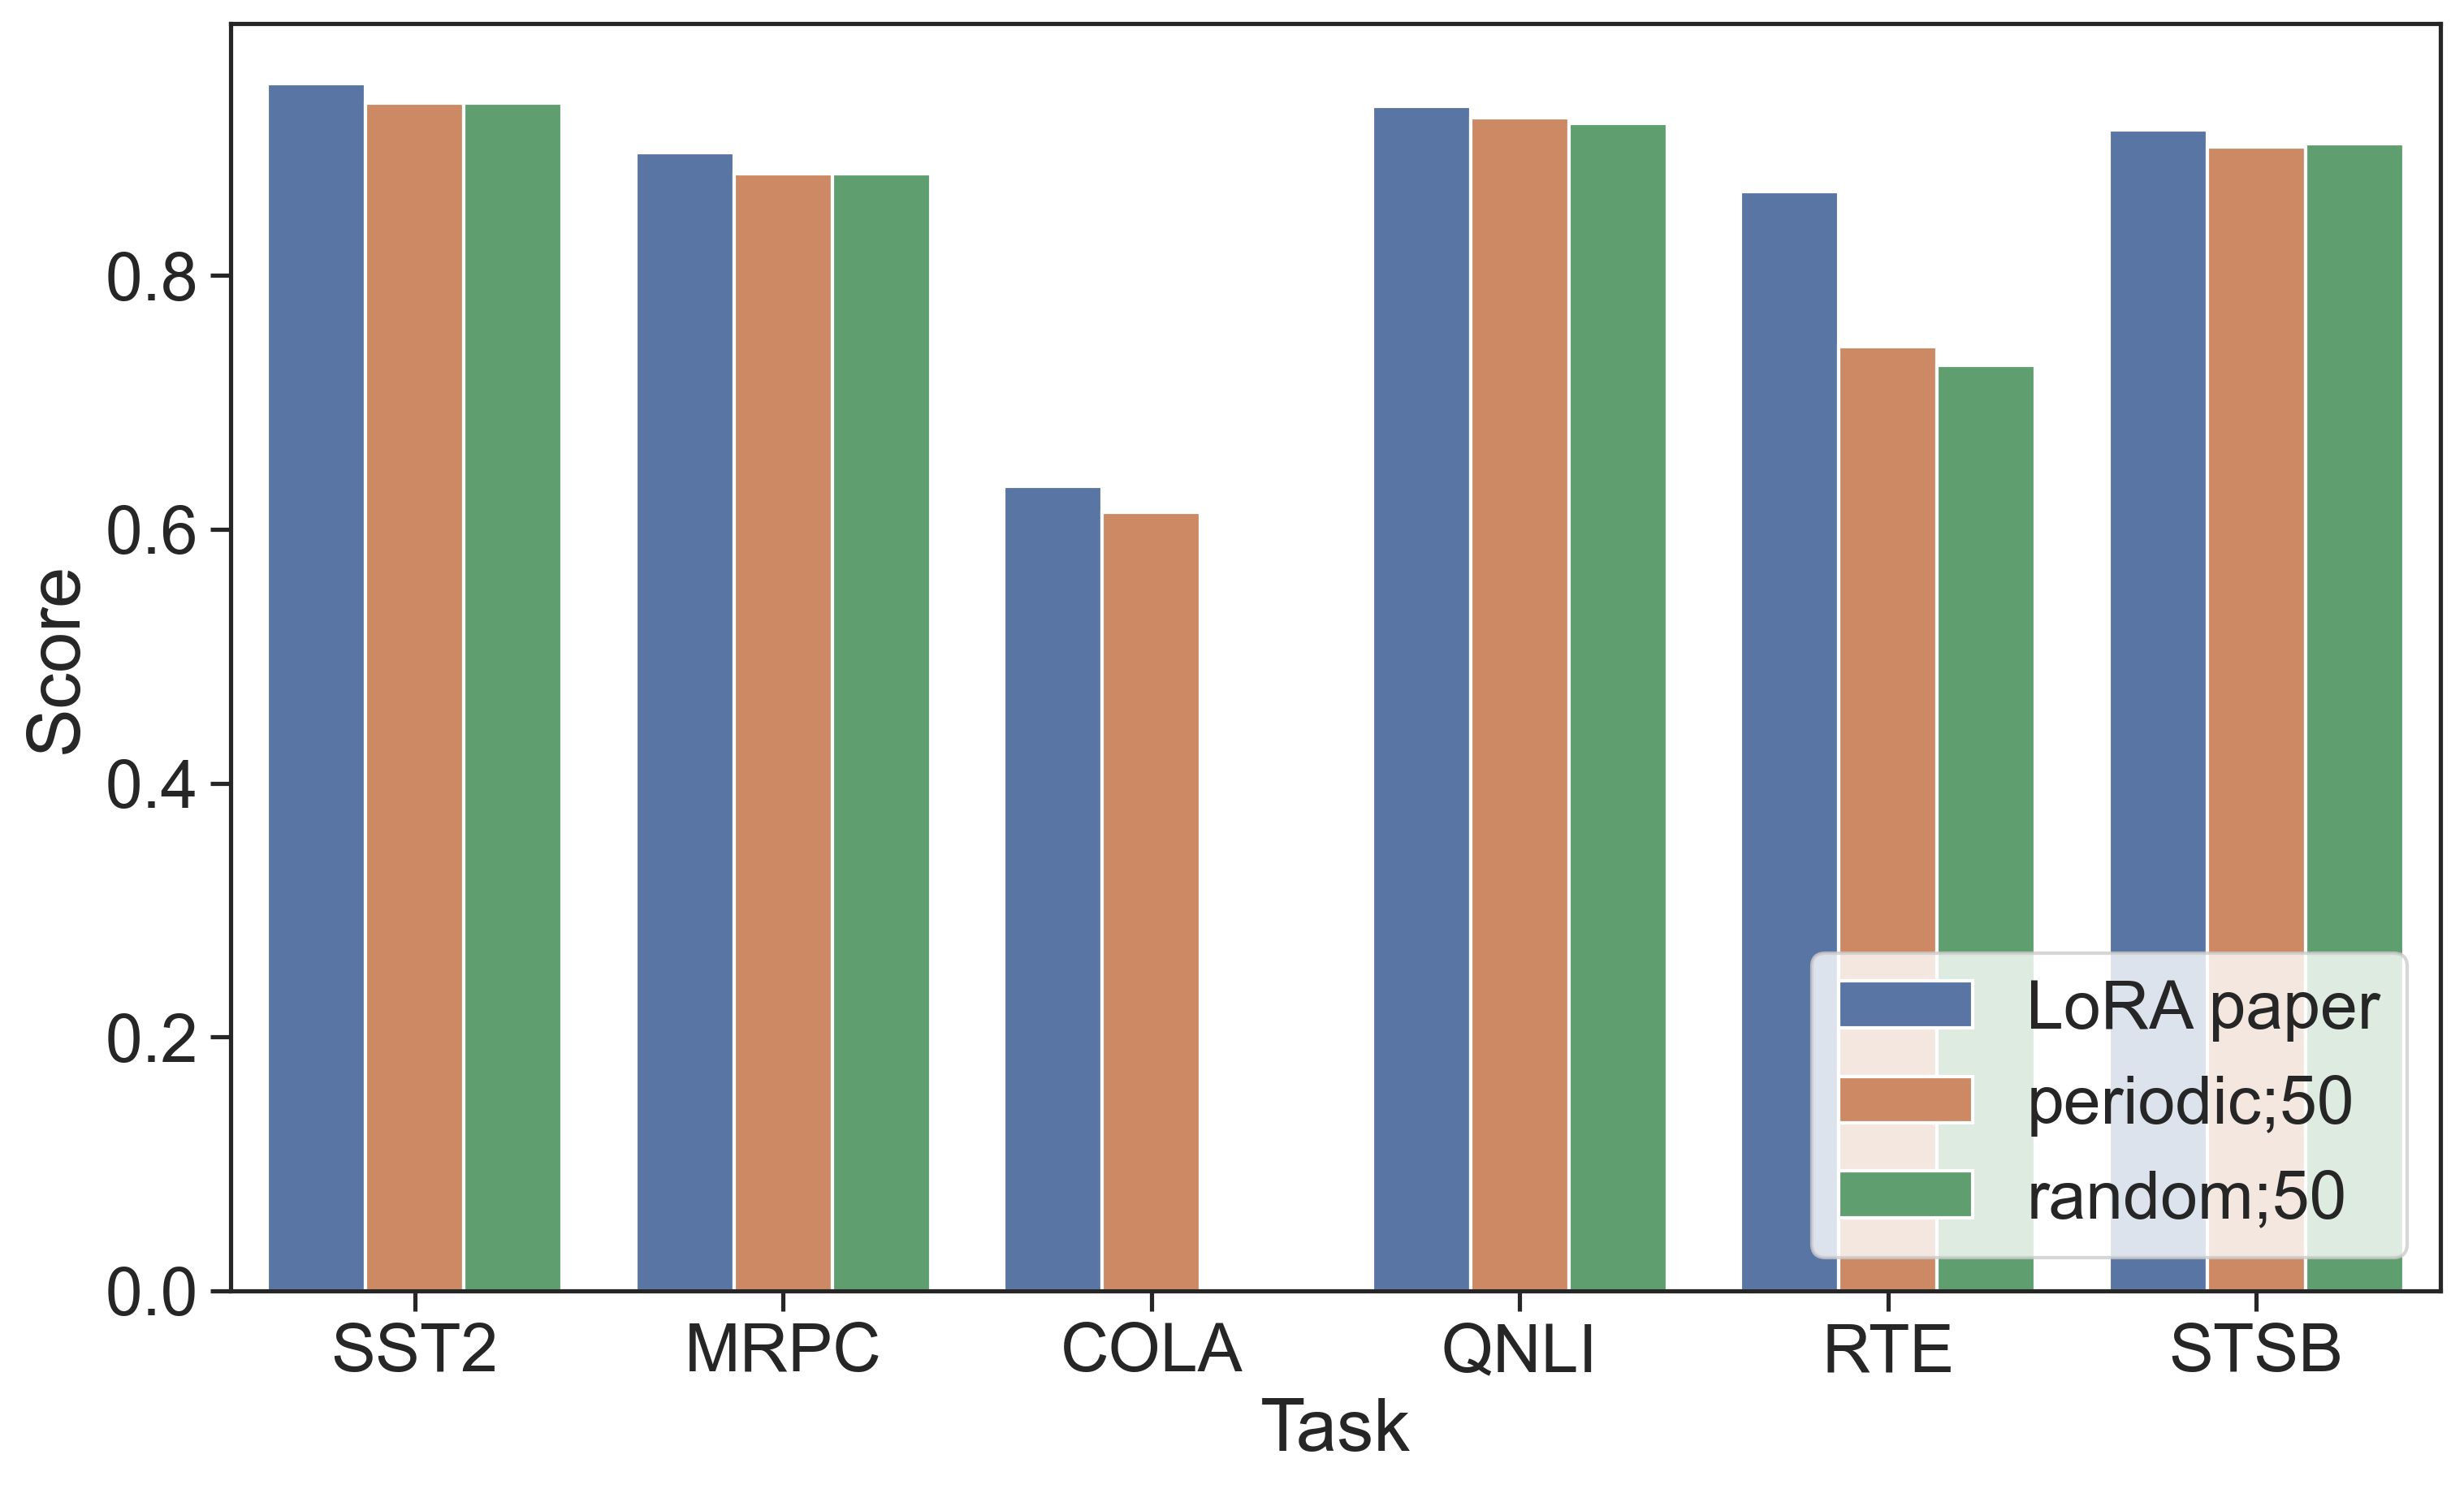

In [22]:
create_barplot(
    data_dicts=[LoRA_paper, dynalora_periodic_qv, dynalora_random_qv ],
    names=['LoRA paper', 'periodic;50', 'random;50'],
    title='DynaLoRA Results Across Different Allocation Strategies (QV:16) [RoBERTa-base]'
    )

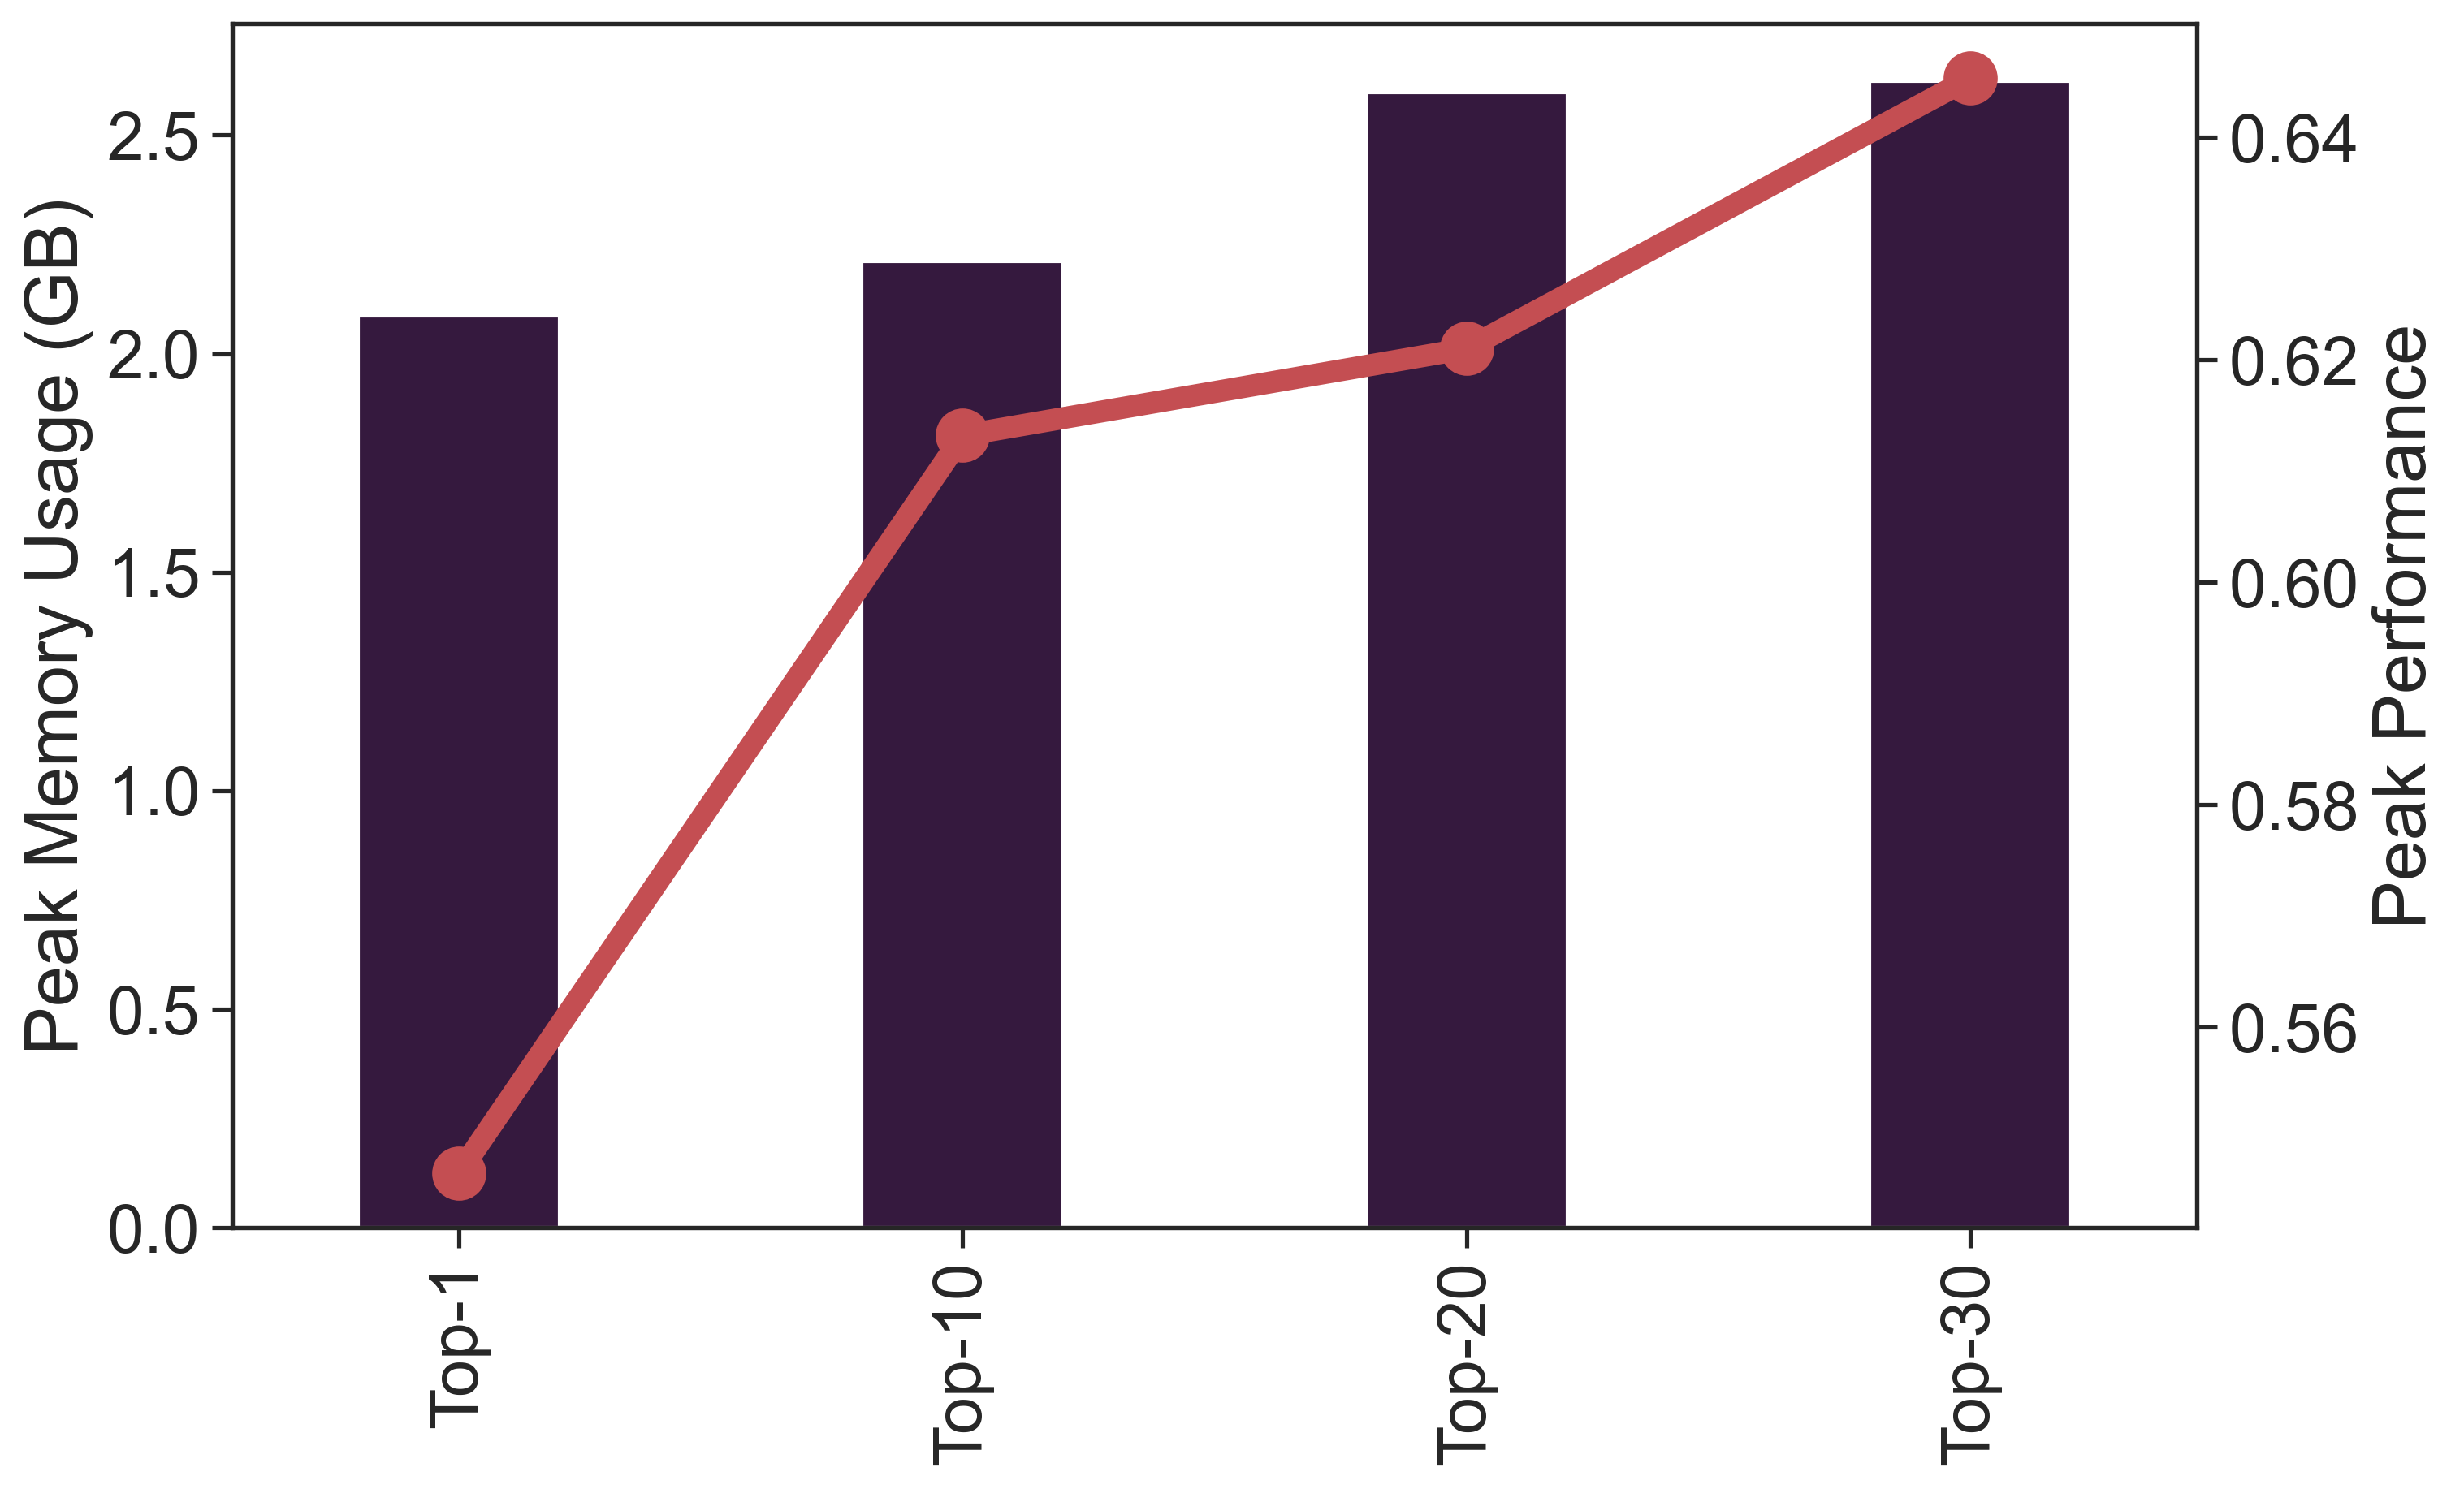

In [54]:
# Peak memory usage vs Peak performance
# Top 1, Top 10, Top 20, Top 30
data = {
    "Top-1":  [2.087, 0.5469],
    "Top-10": [2.210, 0.6132],
    "Top-20": [2.5967, 0.621],
    "Top-30": [2.6239, 0.6453]    
}

sns.set_palette("rocket")

# Produce a bar plot that shows peak memory usage (the first y-axis) and on the other y-axis a line plot that shows peak performance
df = pd.DataFrame(data).T
df.columns = ['Peak Memory Usage (GB)', 'Peak Performance (Accuracy)']
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()
df['Peak Memory Usage (GB)'].plot(kind='bar', ax=ax1, width=0.4, position=0.5)
df['Peak Performance (Accuracy)'].plot(kind='line', ax=ax2, color='r', marker='o', linewidth=6.5, markersize=15)
ax1.set_ylabel('Peak Memory Usage (GB)')
ax2.set_ylabel('Peak Performance')
# plt.title('Peak Memory Usage vs Peak Performance [RoBERTa-base]')
plt.show()



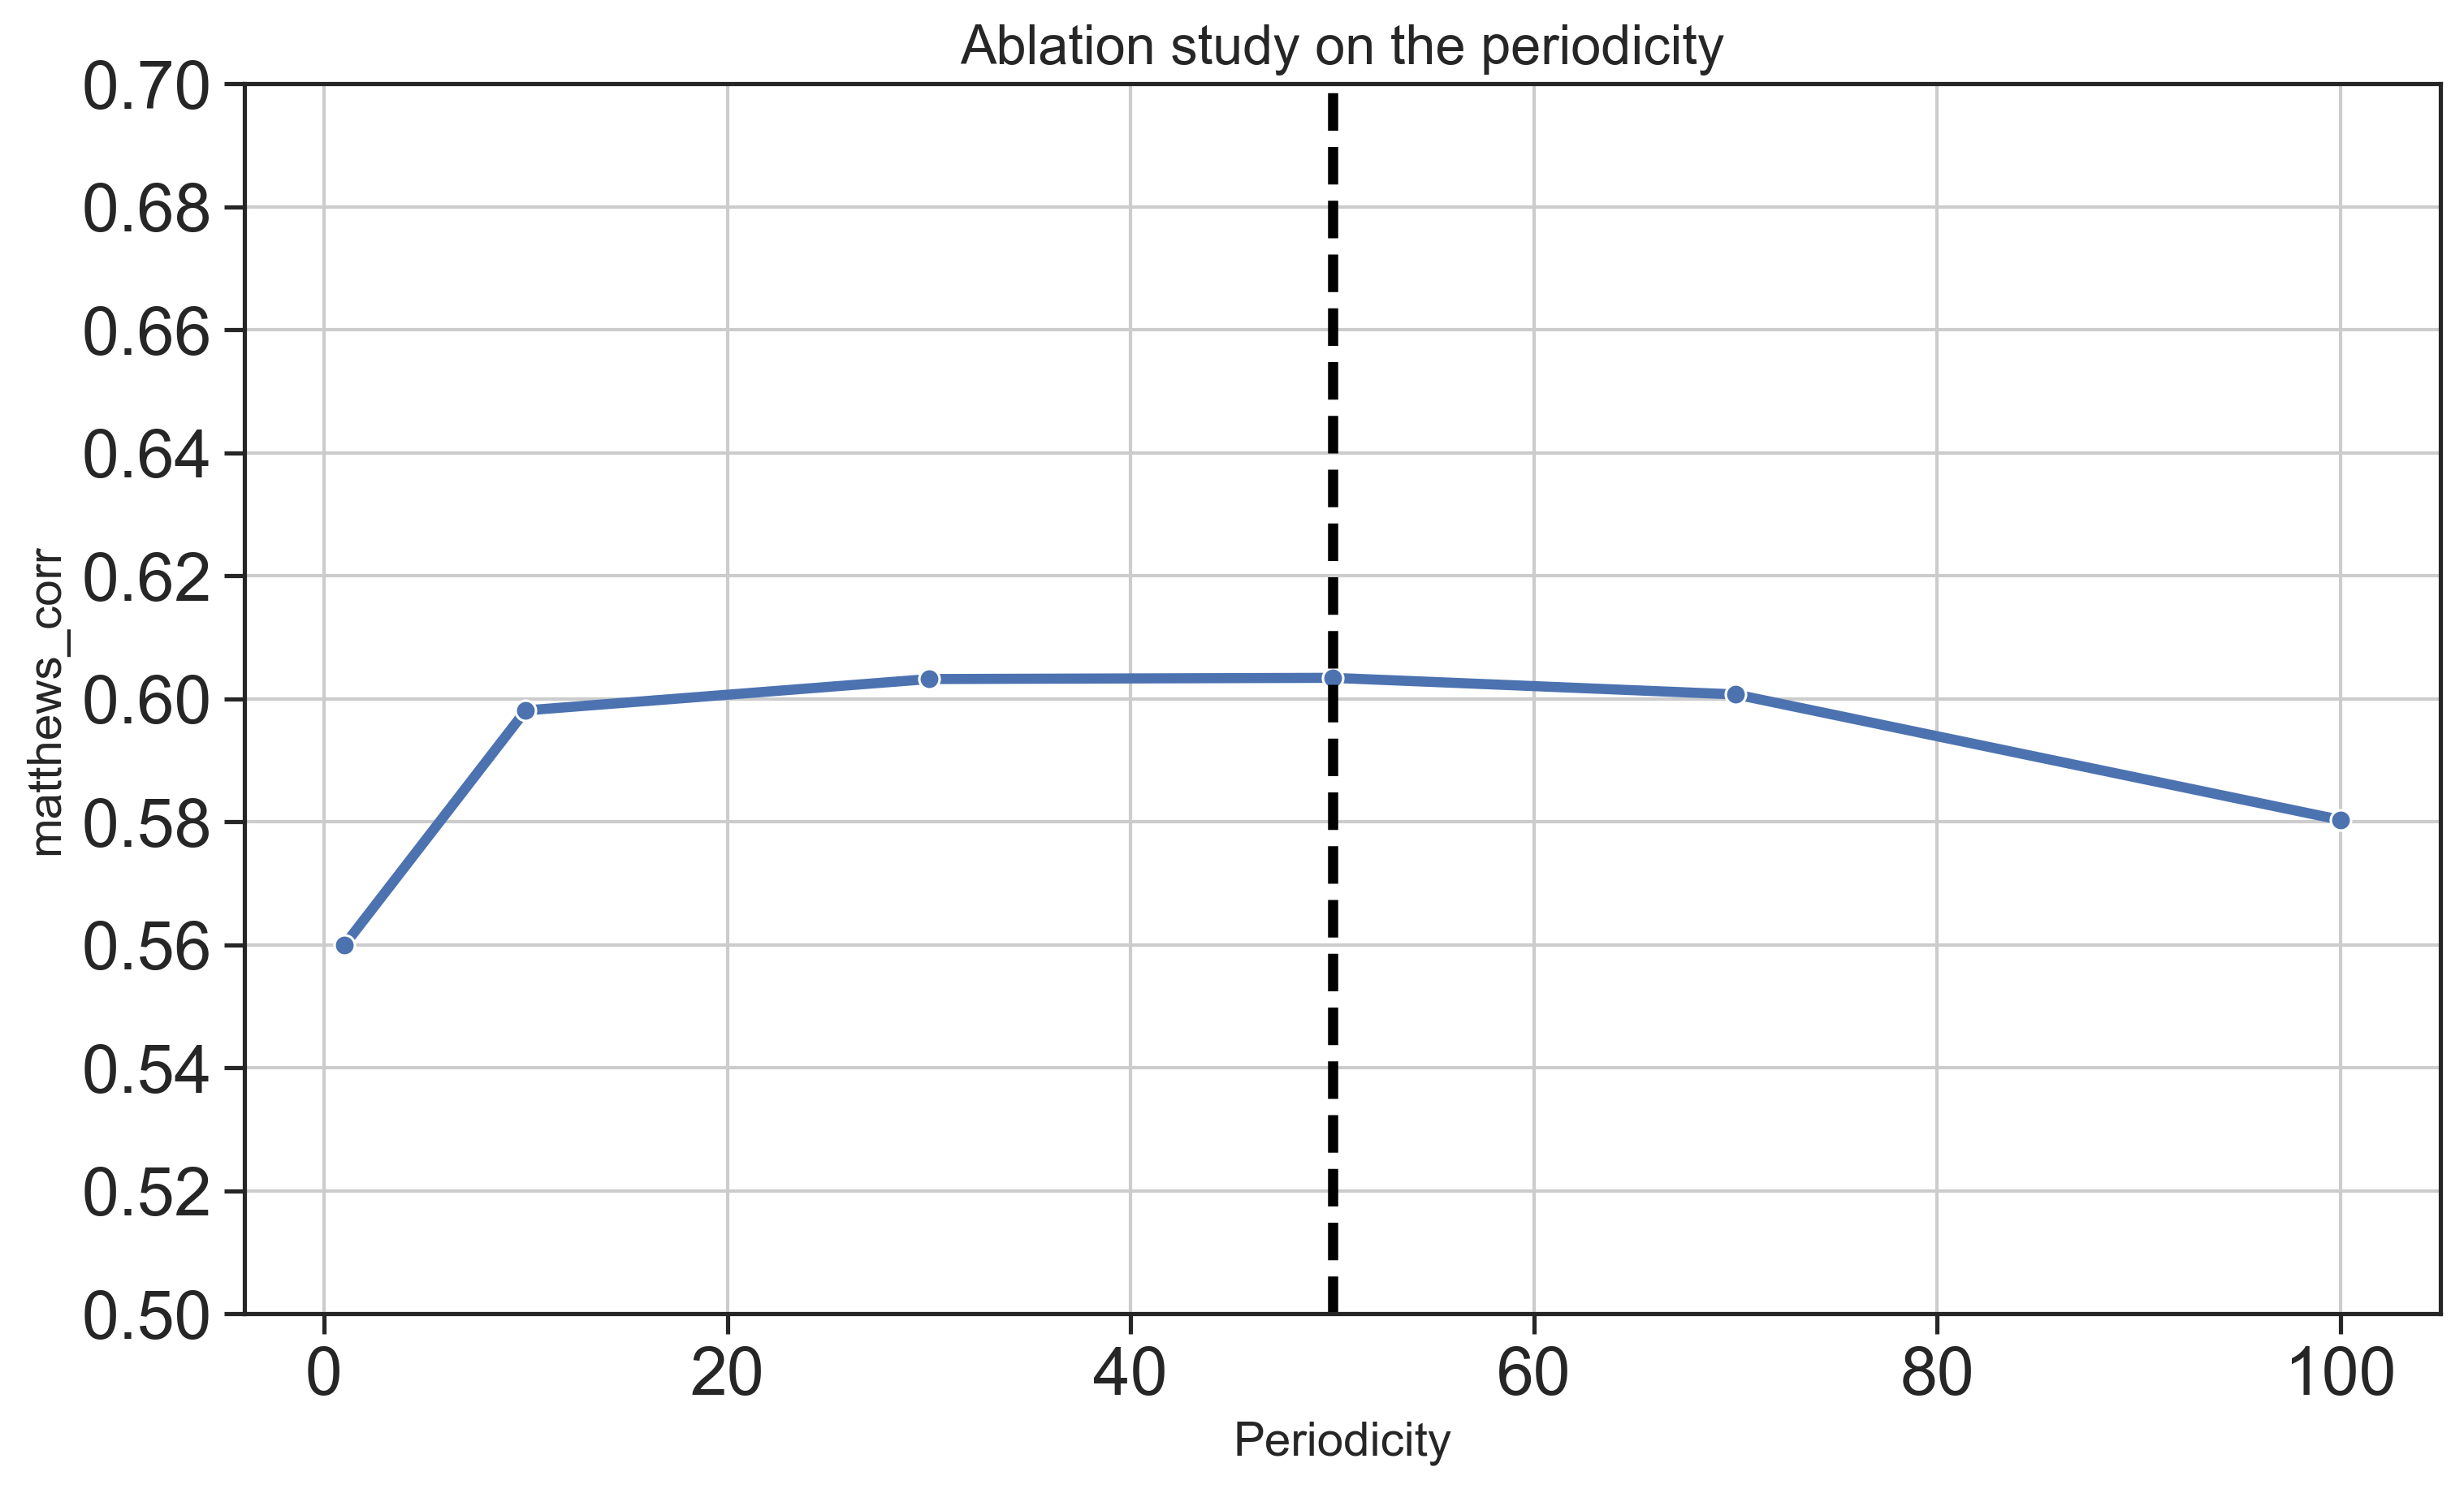

In [23]:
# Periodicity ablation DynaLoRA 
#  task=cola
# seed=42
# batch_size=32
# epochs=80
# learning_rate=4e-04
# warmup_ratio=0.06
# scaled_multinomial;12 

periodicity_results = {
    100 : 0.5803,
    70 : 0.6007,
    50 : 0.6034,
    30 : 0.6032,
    10 : 0.5981,
    1 : 0.5599
}

def plot_ablation(hyperparam_values:list, scores:list, x_label:str, y_label:str, title:str, range_score:tuple):
    data = {
        'hparam' : hyperparam_values,
        'score' : scores
    }
    df = pd.DataFrame(data)

    max_value = df['score'].max()
    max_index = df['score'].idxmax()
    max_hyperparameter = df['hparam'][max_index]

    plt.figure(figsize=(10, 6))
    plot = sns.lineplot(data=df, x='hparam', y='score', marker='o')
    plot.set_title(title, fontsize=16)
    plot.set_xlabel(x_label, fontsize=14)
    plot.set_ylabel(y_label, fontsize=14)
    # plot.set_xticks(df['Periodicity'])
    plot.set_yticks(np.linspace(range_score[0], range_score[1], 11))
    plot.grid(True)

    plot.axvline(x=max_hyperparameter, ls='--', color='black')

    # Show the plot
    plt.show()

plot_ablation(
    periodicity_results.keys(),
    periodicity_results.values(),
    'Periodicity',
    'matthews_corr',
    'Ablation study on the periodicity',
    range_score=(0.5, 0.7)
)
